In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import operator
import random

g = nx.Graph() # grafo vuoto

Genoa = [(1,{"nome": "Perin"}),
(55,{"nome": "Masiello"}),(21,{"nome": "Radovanovic"}),(4,{"nome": "Criscito"}),
(99,{"nome": "Czyborra"}),(20,{"nome": "Strootman"}),(47,{"nome": "Badelj"}),
(16,{"nome": "Zajic"}),(77,{"nome": "Zappacosta"}),
(9,{"nome": "Scamacca"}),(23,{"nome": "Destro"})]

Passaggi = [(1,55,21.0),(55,1,34.0),(1,21,54.0),(21,1,43.0),(1,4,23.0),(4,1,12.0),(4,55,56.0),(55,4,23.0),(21,55,10.0),
(55,21,34.0),(21,4,34.0),(4,21,44.0),(1,99,21.0),(99,1,5.0),(99,55,3.0),(55,99,6.0),(99,21,47.0),
(99,21,47.0),(20,21,15.0),(20,47,80.0),(20,99,16.0),(20,77,35.0),(16,21,5.0),(16,20,34.0),(16,47,45.0),
(16,77,22.0),(16,4,15.0),(16,9,15.0),(16,23,25.0),(16,21,12.0),(77,21,10.0),(77,47,35.0),(77,9,28.0),
(77,23,25.0),(77,16,25.0),(77,20,32.0),(23,9,15.0),(9,23,12.0),(23,77,12.0),(9,77,11.0),(9,16,15.0),
(23,16,21.0),(23,20,2.0),(23,21,4.0),(23,47,15.0),(23,99,11.0),(1,23,25.0),(1,9,14.0),(21,9,8.0),
(21,23,15.0),(4,9,5.0),(4,23,4.0),(47,9,15.0),(47,23,15.0)]

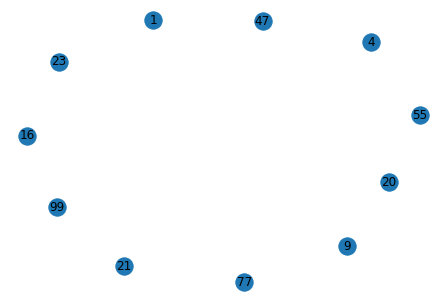

In [2]:
# aggiungo nodi
g.add_nodes_from(Genoa)
g=g.to_directed()

nx.draw(g,with_labels= True)
plt.show()

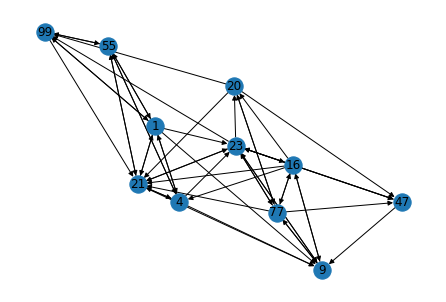

In [3]:
# aggiungo archi
for edge in Passaggi:
    g.add_edge(edge[0], edge[1], passaggi=edge[2])

nx.draw(g,with_labels= True)
plt.show()

In [4]:
# calcolo Il numero di passaggi effettuati e ricevuti dai singoli giocatori
PassList = []

for node in g.nodes(data = True):
    fatti = 0
    ricevuti = 0
    print("[", node[1]['nome'], "]")
    
    for edge in g.edges(data = True):
        if(edge[0]==node[0]):
            fatti+=edge[2]['passaggi']
        if(edge[1]==node[0]):
            ricevuti+=edge[2]['passaggi']
    
    print("fatti: ", fatti, "\nricevuti: ", ricevuti, "\n")
    PassList.append((node[1]['nome'], fatti, ricevuti))

[ Perin ]
fatti:  158.0 
ricevuti:  94.0 

[ Masiello ]
fatti:  97.0 
ricevuti:  90.0 

[ Radovanovic ]
fatti:  110.0 
ricevuti:  220.0 

[ Criscito ]
fatti:  121.0 
ricevuti:  95.0 

[ Czyborra ]
fatti:  55.0 
ricevuti:  54.0 

[ Strootman ]
fatti:  146.0 
ricevuti:  68.0 

[ Badelj ]
fatti:  30.0 
ricevuti:  175.0 

[ Zajic ]
fatti:  168.0 
ricevuti:  61.0 

[ Zappacosta ]
fatti:  155.0 
ricevuti:  80.0 

[ Scamacca ]
fatti:  38.0 
ricevuti:  100.0 

[ Destro ]
fatti:  80.0 
ricevuti:  121.0 



In [5]:
# analisi giocatori

print('\nBetweenness centrality:\n', dict(sorted(nx.betweenness_centrality(g).items(), key=lambda item: item[1])), '\n')

print('\nCloseness centrality:\n', dict(sorted(nx.closeness_centrality(g).items(), key=lambda item: item[1])), '\n')

gdegcen = nx.degree_centrality(g)
print('\nDegree centrality:\n', dict(sorted(gdegcen.items(), key=lambda item: item[1])), '\n')


Betweenness centrality:
 {47: 0.007407407407407408, 55: 0.011111111111111112, 20: 0.011111111111111112, 77: 0.034074074074074076, 4: 0.03777777777777778, 99: 0.03777777777777778, 16: 0.049629629629629635, 1: 0.06666666666666667, 9: 0.07037037037037037, 21: 0.17259259259259263, 23: 0.2903703703703704} 


Closeness centrality:
 {20: 0.5263157894736842, 16: 0.5263157894736842, 1: 0.5555555555555556, 55: 0.5555555555555556, 47: 0.5555555555555556, 77: 0.5555555555555556, 4: 0.5882352941176471, 99: 0.625, 9: 0.7692307692307693, 23: 0.7692307692307693, 21: 0.8333333333333334} 


Degree centrality:
 {47: 0.6000000000000001, 99: 0.7000000000000001, 20: 0.7000000000000001, 55: 0.8, 4: 0.9, 1: 1.0, 16: 1.0, 77: 1.0, 9: 1.0, 21: 1.3, 23: 1.4000000000000001} 



In [6]:
# ATTACCO
attacco = [(9,{"nome": "Scamacca"}),(23,{"nome": "Destro"})]

totPassaggiA = 0
for c in attacco:
    for x in PassList:
        if(c[1]['nome']==x[0]):
            totPassaggiA+=x[1]+x[2]
print('media passaggi attacco: ',totPassaggiA/len(attacco))


# CENTROCAMPO
centrocampo = [(99,{"nome": "Czyborra"}),(20,{"nome": " Strootman"}),(47,{"nome": " Badelj"}),
(16,{"nome": "Zajic"}),(77,{"nome": "Zappacosta"})]

totPassaggiC = 0
for c in centrocampo:
    for x in PassList:
        if(c[1]['nome']==x[0]):
            totPassaggiC+=x[1]+x[2]
print('media passaggi centrocampo: ', totPassaggiC/len(centrocampo))

# DIFESA
difesa = [(1,{"nome": "Perin"}),
(55,{"nome": "Masiello"}),(21,{"nome": "Radovanovic"}),(4,{"nome": "Criscito"})]

totPassaggiD = 0
for c in centrocampo:
    for x in PassList:
        if(c[1]['nome']==x[0]):
            totPassaggiD+=x[1]+x[2]
print('media passaggi difesa: ', totPassaggiD/len(difesa))

media passaggi attacco:  169.5
media passaggi centrocampo:  114.6
media passaggi difesa:  143.25


In [7]:
# uso pagerank per fare una classifica dei migliori giocatori
prg = nx.pagerank(g)
prg_dict = dict(sorted(prg.items(), key=lambda item: item[1], reverse=True))

i=0
for item in prg_dict:
    for c in Genoa:
        if (item == c[0]):
            i+=1
            print('n.', i,' ', c[1]['nome'], '\n')

n. 1   Destro 

n. 2   Scamacca 

n. 3   Radovanovic 

n. 4   Zappacosta 

n. 5   Perin 

n. 6   Masiello 

n. 7   Zajic 

n. 8   Criscito 

n. 9   Czyborra 

n. 10   Badelj 

n. 11   Strootman 

